# Тема: Основы обучения нейронных сетей

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

(1797, 64)


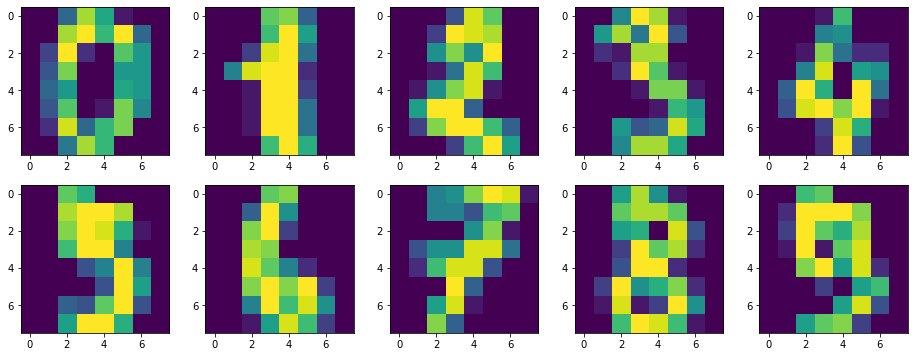

In [236]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [237]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [238]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [239]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

### 1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. 

In [240]:
# Обучение нейронной сети
def training_network(neuron_numb=5, learning_rate=0.1, num_epochs=100):
    # определим число нейронов скрытого слоя
    neuron_numb = neuron_numb

    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

    # скорость обучения (learning rate)
    learning_rate = learning_rate

    # количество итераций
    num_epochs = num_epochs

    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        #  с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
        # ошибка модели
        error = np.mean(np.abs(layer2_error))
    
        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        
    return accuracy, error, w0, w1 

In [241]:
stats_n = pd.DataFrame(columns=['accuracy', 'error', 'w0', 'w1'])

neuron_numbs = [5, 10, 15, 20]

for n in neuron_numbs:
    
    accuracy, error, w0, w1 = training_network(neuron_numb=n)

    stats_n.loc[f'neuron_numb{n}_learning_rate0.1_num_epochs100', 'accuracy'] = round(accuracy, 3)
    stats_n.loc[f'neuron_numb{n}_learning_rate0.1_num_epochs100', 'error'] = round(error, 3)
    stats_n.loc[f'neuron_numb{n}_learning_rate0.1_num_epochs100', 'w0'] = w0
    stats_n.loc[f'neuron_numb{n}_learning_rate0.1_num_epochs100', 'w1'] = w1

In [242]:
stats_r = pd.DataFrame(columns=['accuracy', 'error', 'w0', 'w1'])

learning_rate = [0.1, 0.01, 0.001]

for r in learning_rate:
    
    accuracy, error, w0, w1 = training_network(learning_rate=r)

    stats_r.loc[f'neuron_numb5_learning_rate{r}_num_epochs100', 'accuracy'] = round(accuracy, 3)
    stats_r.loc[f'neuron_numb5_learning_rate{r}_num_epochs100', 'error'] = round(error, 3)
    stats_r.loc[f'neuron_numb5_learning_rate{r}_num_epochs100', 'w0'] = w0
    stats_r.loc[f'neuron_numb5_learning_rate{r}_num_epochs100', 'w1'] = w1

In [243]:
stats_e = pd.DataFrame(columns=['accuracy', 'error', 'w0', 'w1'])

num_epochs = [100, 300, 500]

for e in num_epochs:
    
    accuracy, error, w0, w1 = training_network(num_epochs=e)

    stats_e.loc[f'neuron_numb5_learning_rate5_num_epochs{e}', 'accuracy'] = round(accuracy, 3)
    stats_e.loc[f'neuron_numb5_learning_rate5_num_epochs{e}', 'error'] = round(error, 3)
    stats_e.loc[f'neuron_numb5_learning_rate5_num_epochs{e}', 'w0'] = w0
    stats_e.loc[f'neuron_numb5_learning_rate5_num_epochs{e}', 'w1'] = w1

### 2. Проведите анализ — что приводит к ухудшению точности нейронной сети? 
### Что приводит к увеличению ее точности?

In [244]:
stats_n

,accuracy,error,w0,w1
neuron_numb5_learning_rate0.1_num_epochs100,31.754,0.137,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-2.580195562461926, -3.3523617581687883, -2...."
neuron_numb10_learning_rate0.1_num_epochs100,52.203,0.084,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-14.913077903764808, 0.48932552207842517, -0..."
neuron_numb15_learning_rate0.1_num_epochs100,64.921,0.095,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[3.80795863812324, -7.832247750228096, 5.8926..."
neuron_numb20_learning_rate0.1_num_epochs100,76.309,0.055,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-5.119426454245089, 3.9309831090538365, -5.1..."


**Вывод:**
- увеличение только числа нейронов приводит к увеличению точности нейронной сети

In [245]:
stats_r

,accuracy,error,w0,w1
neuron_numb5_learning_rate0.1_num_epochs100,31.754,0.137,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-2.580195562461926, -3.3523617581687883, -2...."
neuron_numb5_learning_rate0.01_num_epochs100,47.963,0.143,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-2.108220938079365, -0.28148204561208, -2.09..."
neuron_numb5_learning_rate0.001_num_epochs100,10.973,0.18,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-0.5310815909409607, -0.46049061648570694, -..."


**Вывод:**
- увеличение только скорости обучения после значения 0.01 приводит к ухудшению точности нейронной сети

In [246]:
stats_e

,accuracy,error,w0,w1
neuron_numb5_learning_rate5_num_epochs100,31.754,0.137,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-2.580195562461926, -3.3523617581687883, -2...."
neuron_numb5_learning_rate5_num_epochs300,56.027,0.189,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[-1.1448773423721395, -0.03764079044932411, -..."
neuron_numb5_learning_rate5_num_epochs500,60.515,0.135,"[[0.417022004702574, 0.7203244934421581, 0.000...","[[0.024668406123029563, -0.6778502430031499, -..."


**Вывод:**
- увеличение только количества итераций приводит к улучшению точности нейронной сети

In [247]:
# по выводам предыдущих эксперементов можно выбрать лучшие показатели, на них обучить
# финальную нейронную сеть и сделать предсказание на тестовых данных
accuracy, error, w0, w1 = training_network(neuron_numb=20, learning_rate=0.01, num_epochs=500)

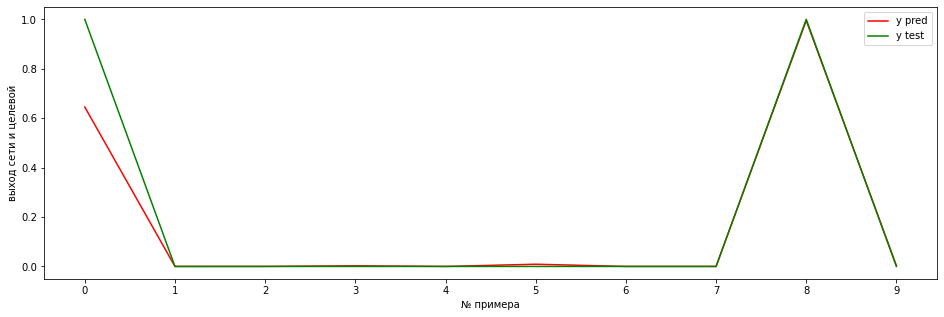

accuracy на тесте 93.77%


In [248]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
     
N = 10
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")